<a href="https://colab.research.google.com/github/christam96/VinBigData-Abnormalities-Detection/blob/master/Assignment/PCA_NN_Assignment_Blank_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Unit 05 - Advanced Neural Network Topics</h1>
<p>In the previous assignment you were introduced to neural networks and used them for a basic classification and regression task. In this assignment you will explore advanced architectures and use cases to broaden you knowledge and skills of neural networks. </p>

<h1>Part A - Imports and Data Prep</h1>
<p>All required imports have been made for you.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from numpy.random import normal
from tensorflow.keras.datasets.mnist import load_data

<h1>Part B - Dimensionality Reduction</h1>
<p>The autoencoder serves many purposes, including dimensionality reduction, de-noising, and anomaly detection.</p>
<p>To show how the autoencoder can perform dimensionality reduction we will use the sklearn wine dataset. Build an autoencoder with one hidden layer to reduce the dimensionality of the feature dataset by 6 features. Use an appropriate activation function and train your encoder for 750 epochs. Visualize the distribution of the difference difference between output and input. </p>
<p> Repeat this for a reduction of the original data by 4 features.</p>
<p>Next you will examine how stacked autoencoders work, repeat the previous but this time increase the number of hidden layers from 1 to 2. Note, these hidden layers should be identical in terms of number of neurons and activation functions.</p>

## EDA

In [2]:
data = load_wine(return_X_y=False)

f_names = data.feature_names 
print("Feature names: ", f_names)
t_names = data.target_names
print("Target names: ", t_names)
data_df = pd.DataFrame(data.data)
data_df.columns = f_names
data_df.head()

Feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names:  ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Scale data, build and fit model for the reduction of original data by **6** features

In [4]:
scaler = MinMaxScaler()
data_df_scaled = scaler.fit_transform(data_df)

In [5]:
model = Sequential()
model.add(Dense(7, input_shape=(13,), activation='relu'))
model.add(Dense(13))#, activation='tanh'))
model.compile(optimizer = 'SGD', loss='mse')
print(model.summary())
history = model.fit(data_df_scaled, data_df_scaled, epochs = 750, verbose= 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 98        
_________________________________________________________________
dense_1 (Dense)              (None, 13)                104       
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
None


## Visualize the distribution of the difference difference between output and input while training

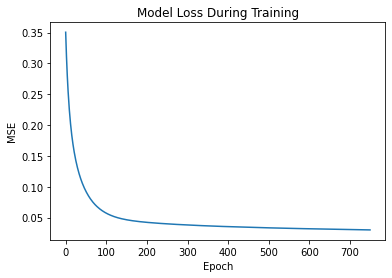

In [6]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

## Build and fit model for the reduction of original data by **4** features

In [9]:
model = Sequential()
model.add(Dense(9, input_shape=(13,), activation='relu'))
model.add(Dense(13))#, activation='tanh'))
model.compile(optimizer = 'SGD', loss='mse')
print(model.summary())
history = model.fit(data_df_scaled, data_df_scaled, epochs = 750, verbose= 0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 126       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                130       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
None


## Visualize the distribution of the difference difference between output and input while training

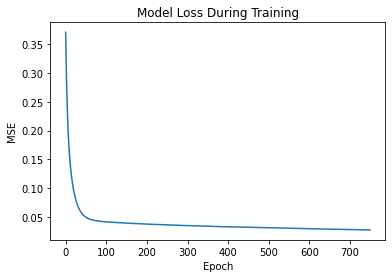

In [10]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

## Build and fit model for the reduction of original data by **6** features. **2** hidden layers

In [11]:
model = Sequential()
model.add(Dense(7, input_shape=(13,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(13))#, activation='tanh'))
model.compile(optimizer = 'SGD', loss='mse')
print(model.summary())
history = model.fit(data_df_scaled, data_df_scaled, epochs = 750, verbose= 0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_8 (Dense)              (None, 13)                104       
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________
None


## Visualize the distribution of the difference difference between output and input while training

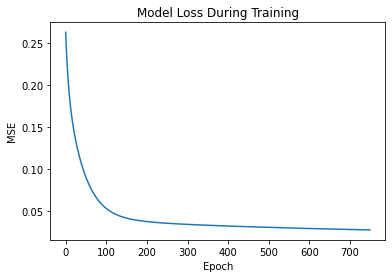

In [13]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

## Build and fit model for the reduction of original data by **4** features. **2** hidden layers

In [14]:
model = Sequential()
model.add(Dense(9, input_shape=(13,), activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(13))#, activation='tanh'))
model.compile(optimizer = 'SGD', loss='mse')
print(model.summary())
history = model.fit(data_df_scaled, data_df_scaled, epochs = 750, verbose= 0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 9)                 126       
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_11 (Dense)             (None, 13)                130       
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
None


## Visualize the distribution of the difference difference between output and input while training

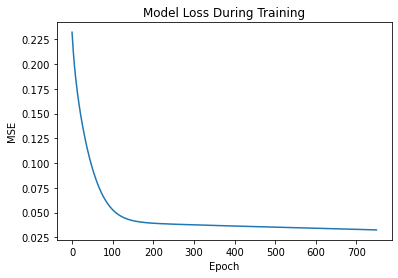

In [15]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

<h1>Part C - Noise Reduction</h1>

<p>To illustrate the ability of our autoencoder to reduce noise we will be using image data. Use the load_data function with the path attribute set to "mnist.npz". You only care about the image data so you need to extract the images from the imported data and get rid of the labels. Ensure your pixel values are between 0 and 1 and save this to the variable X_2</p>
<p> To simulate a noisy image, we will be adding white Gausian noise to the data. To do this, you will need to use the normal function with a mean of 0 and a varience of 0.1. Cycle through the images in X_2, add noise, and save to a variable called X_2_noise. </p>
<p>Display the first image in X_2 and the first image in X_2_noise to see the effect of the noise you added</p>

In [17]:
dataImg = load_data("mnist.npz")
